In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
pic_path="C:\mypython\plots"
file="C:/mypython/datasets/SYB63_200_202009_Employment.csv"
data=pd.read_csv(file)
data.head()

,Unnamed: 0,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,36.970,Estimate.,"International Labour Organization (ILO), Genev..."
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.211,Estimate.,"International Labour Organization (ILO), Genev..."
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.819,Estimate.,"International Labour Organization (ILO), Genev..."
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.256,Estimate.,"International Labour Organization (ILO), Genev..."
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.161,Estimate.,"International Labour Organization (ILO), Genev..."


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965 entries, 0 to 7964
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7965 non-null   int64  
 1   Region/Country/Area  7965 non-null   object 
 2   Year                 7965 non-null   int64  
 3   Series               7965 non-null   object 
 4   Value                7965 non-null   float64
 5   Footnotes            5508 non-null   object 
 6   Source               7965 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 435.7+ KB


In [3]:
data.drop(columns="Unnamed: 0",inplace=True)                               #删除 Unnamed: 0 这列
data.rename(columns={"Region/Country/Area":"Area"},inplace=True)                # 重命名
data.rename(columns=dict( (k,k.lower()) for k in  data.columns ),inplace=True)  # 列名全部小写
def industry(x):
    """正则匹配series字段 字符串的产业类型"""
    if re.findall("Employment by industry:(.*?)\(",x):
        return re.findall("Employment by industry:(.*?)\(",x)[0].strip()
def gender(x):
    """正则匹配series字段 字符串中各产业从业人员性别"""
    if " Male and Female" in x:
        return "both"
    elif "Male" in x:
        return "Male"
    elif "Female" in x:
        return "Female"
    else:
        return "Error"
data['economy']=data['series'].apply(industry)
data['gender']=data['series'].apply(gender)
data.head()

,area,year,series,value,footnotes,source,economy,gender
0,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,36.970,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,both
1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.211,Estimate.,"International Labour Organization (ILO), Genev...",Industry,both
2,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.819,Estimate.,"International Labour Organization (ILO), Genev...",Services,both
3,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.256,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Male
4,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.161,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male


In [11]:
df0=data[(data['gender']=='both')&(data['area']=="China")&(data['year']).isin([2010])].sort_values('economy',ascending=False)
df0

,area,year,series,value,footnotes,source,economy,gender
2183,China,2010,Employment by industry: Services (%) Male and ...,34.6,"Estimate.;For statistical purposes, the data f...","International Labour Organization (ILO), Genev...",Services,both
2182,China,2010,Employment by industry: Industry (%) Male and ...,28.7,"Estimate.;For statistical purposes, the data f...","International Labour Organization (ILO), Genev...",Industry,both
2181,China,2010,Employment by industry: Agriculture (%) Male a...,36.7,"Estimate.;For statistical purposes, the data f...","International Labour Organization (ILO), Genev...",Agriculture,both


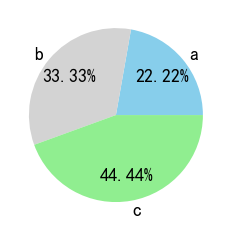

In [14]:
labels=['a','b','c']                           #扇形标签
values=[10,15,20]                              #饼图各部分值
colors=["skyblue","lightgray","lightgreen"]    #各个扇形颜色
plt.pie(values,labels=labels,startangle=0,autopct="%.2f%%",textprops={'fontsize':18},colors=colors,pctdistance=0.7)
plt.show()

In [9]:
years=[2005,2010,2015,2020]                 #观察年份
areas=["Thailand","Malaysia","Viet Nam"]     #观察国家
df=data[(data['gender']=='both')&(data['area'].isin(areas))&(data['year']).isin(years)]    #筛选 不缺分性别的数据
df=df.sort_values(by=['area','year','economy'],ascending=[1,1,0]) #饼图扇形顺序与数据顺序相反，按照 Service、 Industry、Agriculture降序
data.sort_values(['area','year','gender'])

,area,year,series,value,footnotes,source,economy,gender
834,Afghanistan,2005,Employment by industry: Agriculture (%) Female,78.491,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Female
835,Afghanistan,2005,Employment by industry: Industry (%) Female,11.488,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Female
836,Afghanistan,2005,Employment by industry: Services (%) Female,10.021,Estimate.,"International Labour Organization (ILO), Genev...",Services,Female
831,Afghanistan,2005,Employment by industry: Agriculture (%) Male,59.362,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Male
832,Afghanistan,2005,Employment by industry: Industry (%) Male,11.535,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male
...,...,...,...,...,...,...,...,...
7924,Zimbabwe,2020,Employment by industry: Industry (%) Male,11.306,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male
7925,Zimbabwe,2020,Employment by industry: Services (%) Male,25.810,Estimate.,"International Labour Organization (ILO), Genev...",Services,Male
7920,Zimbabwe,2020,Employment by industry: Agriculture (%) Male a...,66.270,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,both
7921,Zimbabwe,2020,Employment by industry: Industry (%) Male and ...,6.545,Estimate.,"International Labour Organization (ILO), Genev...",Industry,both


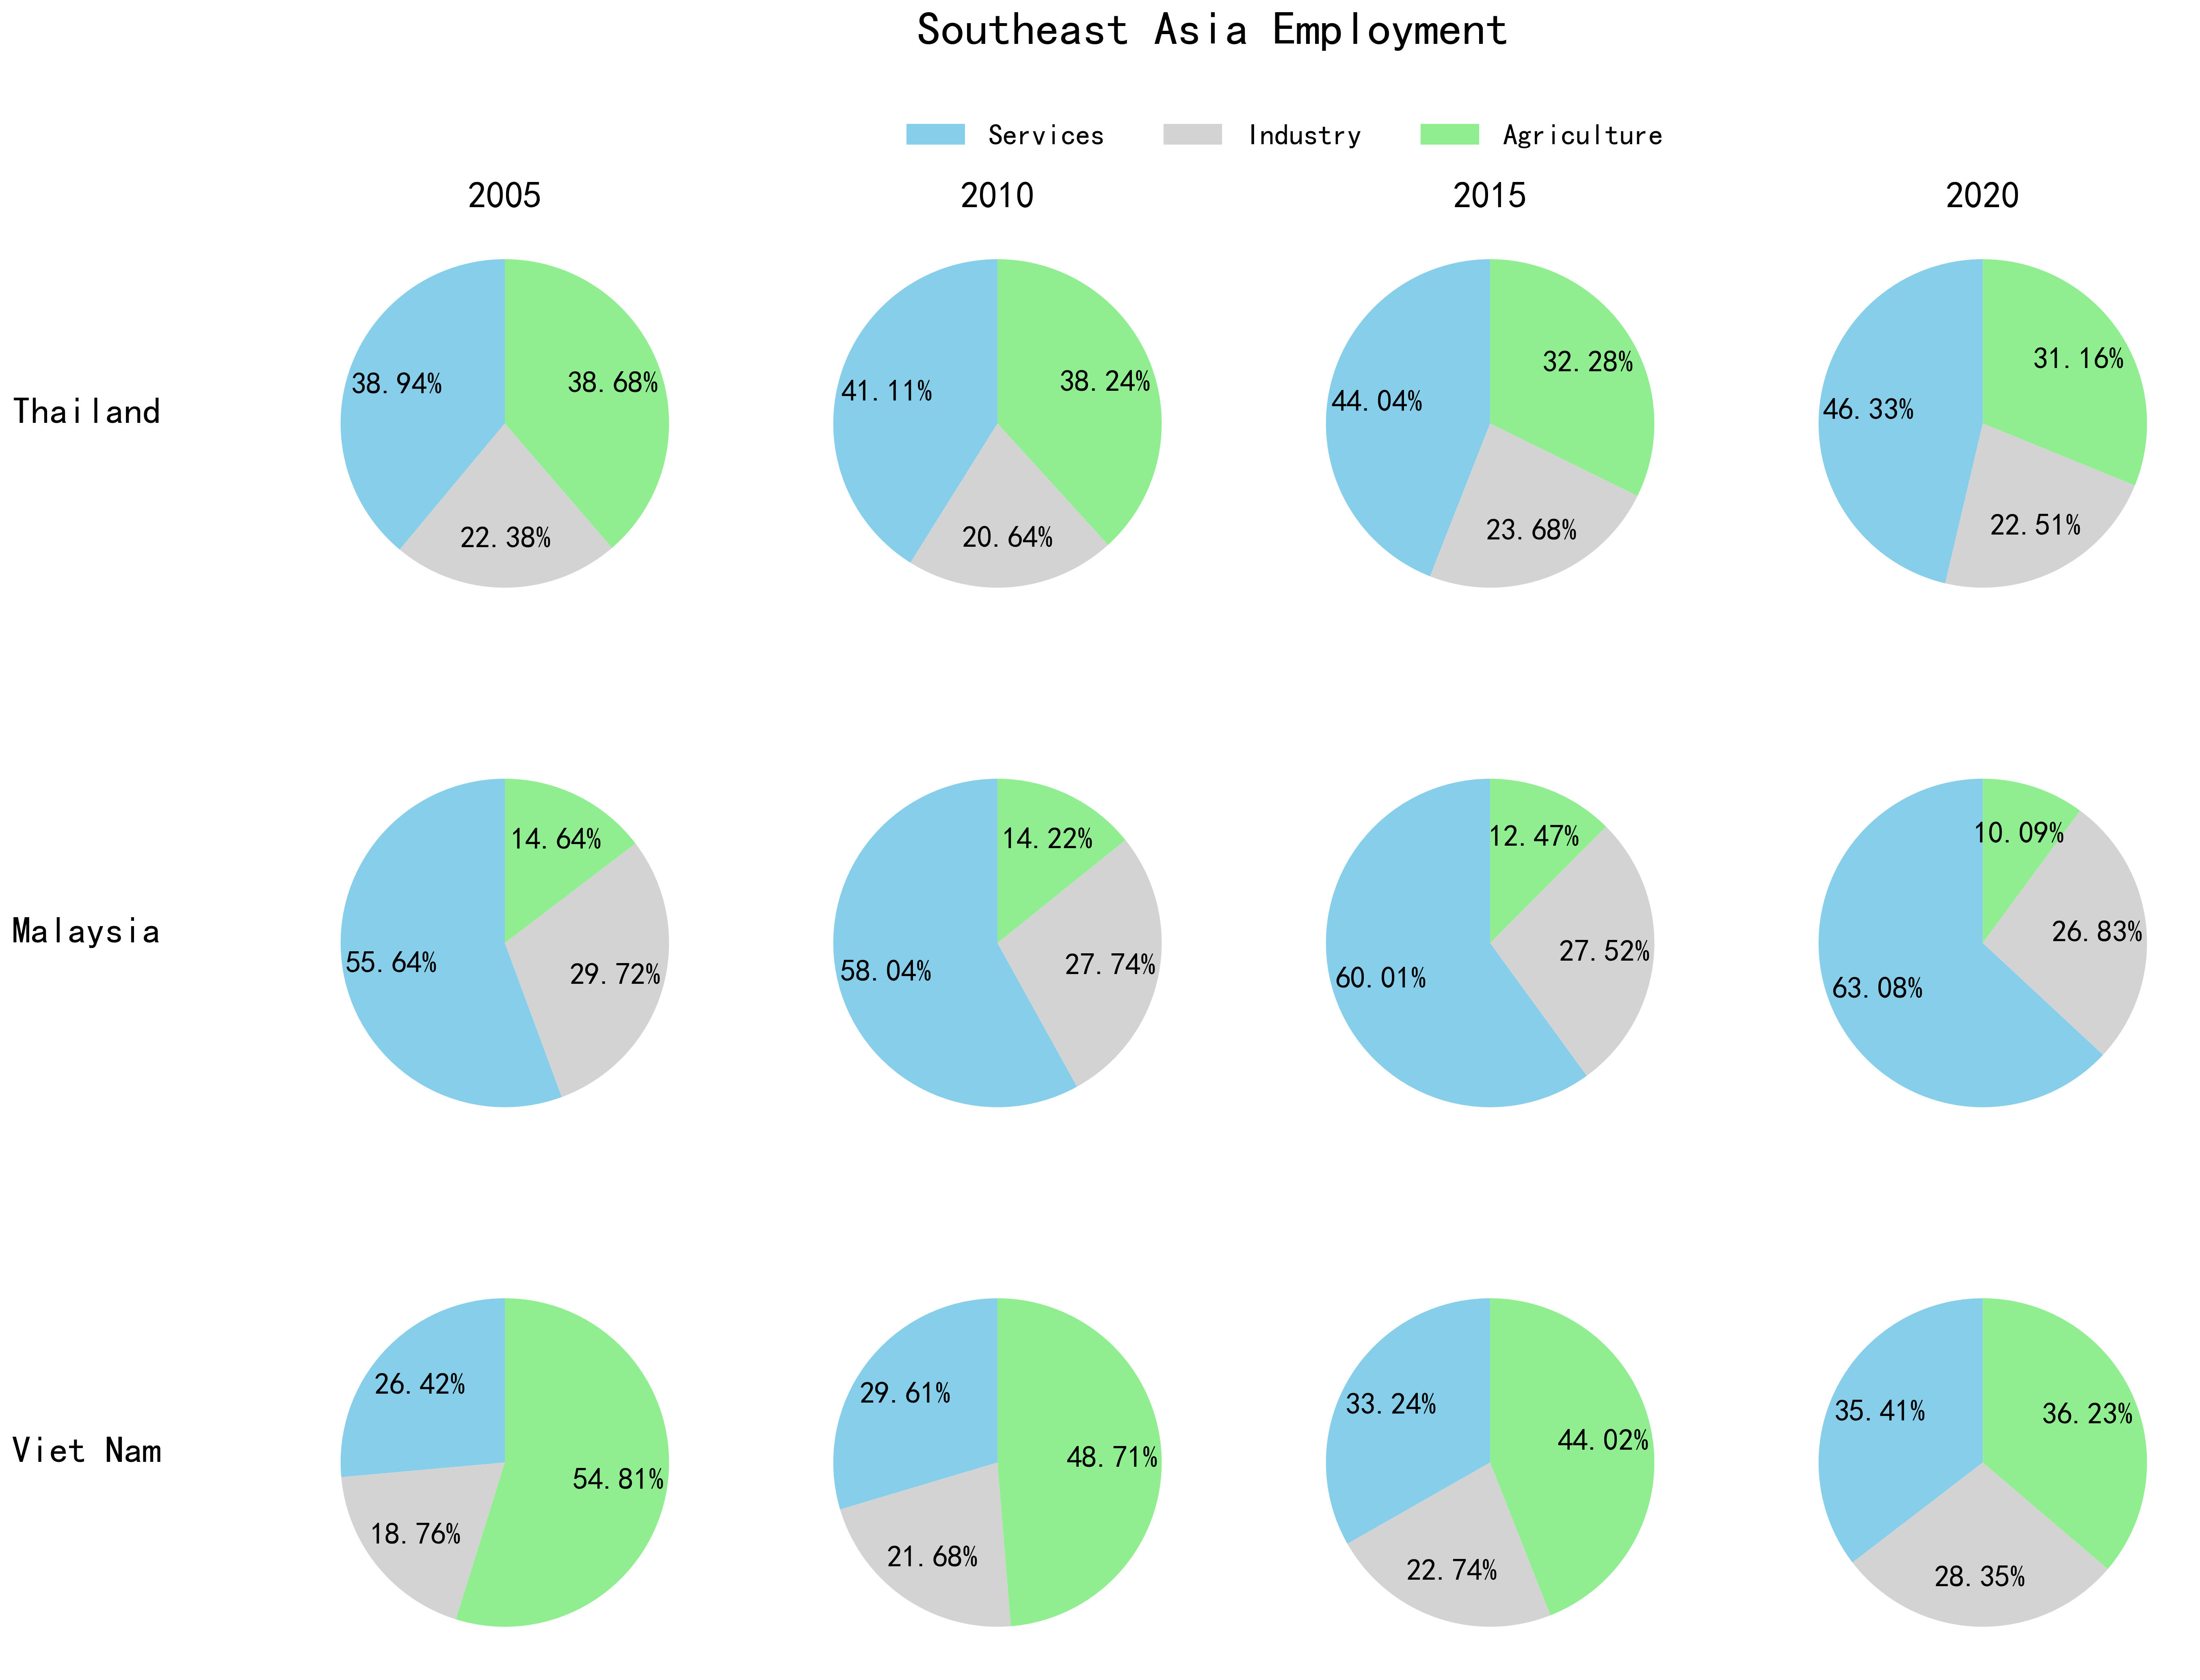

In [10]:
fig,axes=plt.subplots(3,4,figsize=(20,16),dpi=300)
axes=axes.flatten()                                #一维
colors=["skyblue","lightgray","lightgreen"]         #颜色设置，skyblue :服务业，lightgray:工业, lightgreen: 农业。         
legend_labels=['Services','Industry','Agriculture'] #饼图绘制各个部分是逆序画，所以这里颜色和图例标签也是逆序
for p,a in enumerate(areas):                       #遍历国家
    dat=df[df['area']==a]                         
    for q,y in enumerate(years):                  #遍历年份
#         labels=dat[dat['year']==y]['economy']   #绘制每个字饼图各部分标签
        values=dat[dat['year']==y]['value']      #饼图各部分比例值
        idx=p*4+q                                #饼图位置
        axes[idx].pie(values,startangle=90,autopct="%.2f%%",textprops={'fontsize':18},colors=colors,pctdistance=0.7)
        if idx <4:
            axes[idx].set_title(str(y),fontdict={'fontsize':"22"})     #第一行每个图上面标上时间
        if idx%4==0:
            axes[idx].text(x=-3,y=0,s=a,fontdict={"fontsize":"22"})    #第一列每个图左边标上国家

# xlim=fig.gca().axes.get_xlim()
# ylim=fig.gca().axes.get_ylim()
axes[2].legend(labels=legend_labels,loc='center', bbox_to_anchor=(0,1.2),
               ncol=3,fontsize='xx-large',edgecolor='w',fancybox=False,shadow=False)  #标题下的图例解释
fig.suptitle("Southeast Asia Employment",fontsize=28)  #大标题
plt.savefig(pic_path+"\Southeast_Asia_Employmen.png")